In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sb

plt.rcParams['font.sans-serif'] = ['SimHei'] # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False 


In [55]:
A, M = 2, 6
FileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A'+str(A)+'M'+str(M)
add1 = FileAdd + 'tauSimSingle.csv'
add2 = FileAdd + 'tauOdeSingle.csv'

In [56]:
pd1 = pd.read_csv(add1, index_col = 0)
pd2 = pd.read_csv(add2, index_col = 0)

In [57]:
pd1.head()

,n,ns,l,ls,i,is,epi,smt,para
0,0.656364,0.036644,0.423186,0.034791,0.879047,0.012191,0,0.2,0.2
1,0.743469,0.017138,0.363944,0.015404,0.857567,0.006130,0,0.3,0.3
2,0.793601,0.007400,0.336307,0.020266,0.852550,0.011620,0,0.4,0.4
3,0.830488,0.011143,0.330451,0.013896,0.853388,0.006318,0,0.5,0.5
4,0.853283,0.006513,0.319176,0.021798,0.852274,0.008474,0,0.6,0.6


In [45]:
?plt.savefig

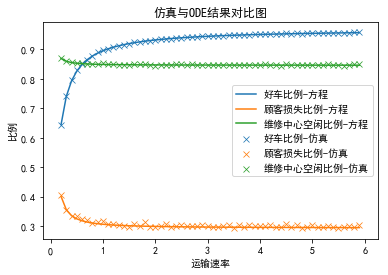

In [68]:
df1 = pd1[pd1.para<6].groupby('para').mean()
df2 = pd2[pd2.para<6].groupby('para').mean()
for f in ['n', 'l', 'i']:
    sb.scatterplot(df1.index, df1[f], marker = 'x')
    plt.plot(df2.index, df2[f])
plt.ylabel('比例')
plt.xlabel('运输速率')
plt.title('仿真与ODE结果对比图')
plt.legend(['好车比例-方程', '顾客损失比例-方程','维修中心空闲比例-方程','好车比例-仿真','顾客损失比例-仿真',
           '维修中心空闲比例-仿真',
           ])
plt.savefig(FileAdd+'仿真-odeSingle.png', dpi=150, bbox_inches='tight')

In [10]:
A, M = 2, 6
FileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A'+str(A)+'M'+str(M)
add1 = FileAdd + 'MuSimSingle.csv'
add2 = FileAdd + 'MuOdeSingle.csv'

In [11]:
pd1 = pd.read_csv(add1, index_col = 0)
pd2 = pd.read_csv(add2, index_col = 0)

In [12]:
pd1.head()

,n,ns,l,ls,i,is,epi,smt,para
0,0.222798,0.015120,0.881684,0.006430,0.018175,0.046626,0,0.2,0.2
1,0.326569,0.019264,0.826896,0.007364,0.067336,0.046034,0,0.3,0.3
2,0.400280,0.009226,0.788927,0.007374,0.130616,0.015496,0,0.4,0.4
3,0.457653,0.012136,0.760022,0.007705,0.208983,0.013000,0,0.5,0.5
4,0.493810,0.011685,0.740375,0.006266,0.277435,0.019485,0,0.6,0.6


In [45]:
?plt.savefig

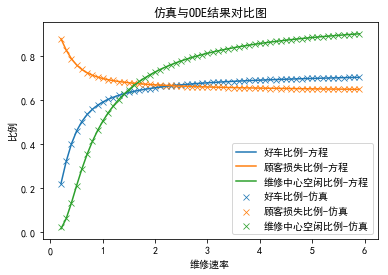

In [14]:
df1 = pd1[pd1.para<6].groupby('para').mean()
df2 = pd2[pd2.para<6].groupby('para').mean()
for f in ['n', 'l', 'i']:
    sb.scatterplot(df1.index, df1[f], marker = 'x')
    plt.plot(df2.index, df2[f])
plt.ylabel('比例')
plt.xlabel('维修速率')
plt.title('仿真与ODE结果对比图')
plt.legend(['好车比例-方程', '顾客损失比例-方程','维修中心空闲比例-方程','好车比例-仿真','顾客损失比例-仿真',
           '维修中心空闲比例-仿真',
           ])
plt.savefig(FileAdd+'仿真-odeSingleVaryMu.png', dpi=150, bbox_inches='tight')

# A2M6 vary VN

In [16]:
A, M = 2,6
fileAdd = 'C:\\Rebalancing\\2020-8-31\\result\\A2M6VNSeed2.csv'
df = pd.read_csv(fileAdd).drop(['Unnamed: 0'], axis=1)
df.head()

,l,ls,epi,smt,para
0,0.317041,0.000136,0,1,1
1,0.289743,0.000145,0,1,2
2,0.268204,0.000242,0,1,3
3,0.274332,0.000284,0,1,4
4,0.271430,0.000259,0,1,5


In [17]:
data = df.groupby(['smt','para'], as_index=False).mean()[['smt', 'para','l']]

Text(0.5, 0, '顾客损失比例')

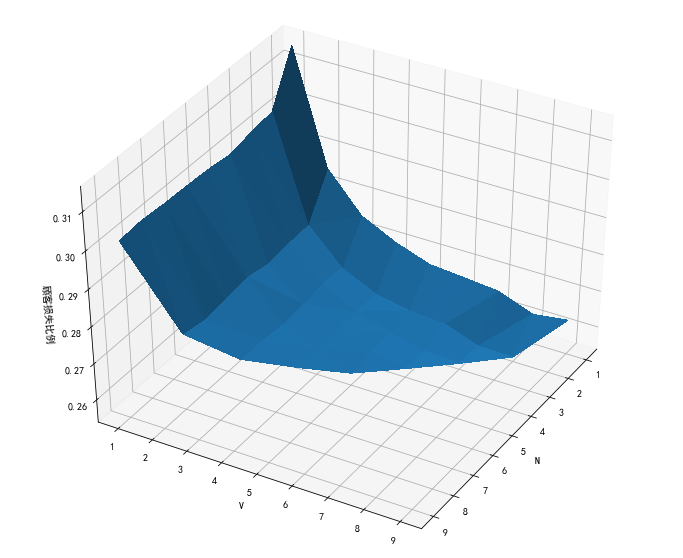

<Figure size 3000x2000 with 0 Axes>

In [18]:
from mpl_toolkits import mplot3d
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12,10))
ax = plt.axes(projection='3d')
plt.figure(dpi=500)


X = data.smt.values
Y = data.para.values
Z = data.l.values

ax.plot_trisurf(X, Y, Z, edgecolor='none',linewidth=0, antialiased=False)
ax.view_init(40, 30)
ax.set_xlabel('N')
ax.set_ylabel('V')
ax.set_zlabel('顾客损失比例')